In [1]:
import pandas as pd
import numpy as np
from pydataset import data
from pandas_profiling import ProfileReport
import env
import wrangle
import matplotlib.pyplot as plt
import split_scale
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import explore

In [2]:
tips = data('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


# Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [4]:
from sklearn.model_selection import train_test_split
seed = 123

train, test = train_test_split(tips, train_size=.80, random_state=seed)

print(train.shape, test.shape)

(195, 7) (49, 7)


In [5]:
train = train[['total_bill', 'tip']]
train.head()

,total_bill,tip
24,39.42,7.58
191,15.69,1.50
210,12.76,2.23
11,10.27,1.71
197,10.34,2.00


In [6]:
train.columns = ['x', 'y']
train.head()

,x,y
24,39.42,7.58
191,15.69,1.50
210,12.76,2.23
11,10.27,1.71
197,10.34,2.00


In [7]:
train['yhat_bl'] = train.y.mean()

In [8]:
train.head()

,x,y,yhat_bl
24,39.42,7.58,3.021641
191,15.69,1.50,3.021641
210,12.76,2.23,3.021641
11,10.27,1.71,3.021641
197,10.34,2.00,3.021641


In [9]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_bl = sqrt(mean_squared_error(train.y, train.yhat_bl))


In [10]:
print(rmse_bl)

1.469676180750581


In [11]:
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('y ~ x', data = train).fit()

# compute predictions and add to original dataframe
train['yhat'] = ols_model.predict(train.x)
train.head(3)

,x,y,yhat_bl,yhat
24,39.42,7.58,3.021641,5.272078
191,15.69,1.50,3.021641,2.576639
210,12.76,2.23,3.021641,2.243827


In [12]:
rmse = sqrt(mean_squared_error(train.y, train.yhat))
rmse

1.06736020074831

# Plot the residuals for the linear regression model that you made.

In [14]:
train['residual'] = train['yhat'] - train['y']
train['residual_baseline'] = train['yhat_bl'] - train['y']

In [15]:
train.head()

,x,y,yhat_bl,yhat,residual,residual_baseline
24,39.42,7.58,3.021641,5.272078,-2.307922,-4.558359
191,15.69,1.50,3.021641,2.576639,1.076639,1.521641
210,12.76,2.23,3.021641,2.243827,0.013827,0.791641
11,10.27,1.71,3.021641,1.960993,0.250993,1.311641
197,10.34,2.00,3.021641,1.968944,-0.031056,1.021641


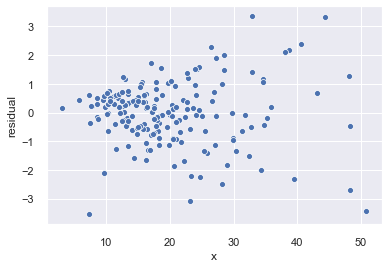

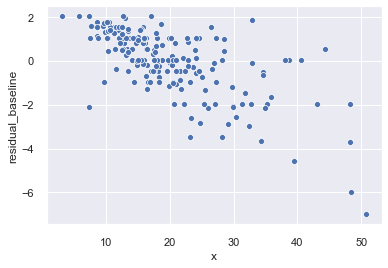

In [23]:
sns.scatterplot(x='x', y='residual',  data=train)
plt.figure()
sns.scatterplot(x='x', y='residual_baseline',  data=train)

# Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

 # Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).




In [33]:
from sklearn.metrics import mean_squared_error

SSE = mean_squared_error(train.y, train.yhat)*len(train)
SSE_baseline = mean_squared_error(train.y, train.yhat_bl)*len(train)

SSE, SSE_baseline

(222.15527063758722, 421.18987487179476)

In [34]:
ESS = sum((train.yhat - train.y.mean())**2)
ESS_baseline = sum((train.yhat_bl - train.y.mean())**2)


ESS, ESS_baseline

(199.03460423420773, 0.0)

In [37]:
TSS = ESS + SSE
TSS_baseline = ESS_baseline + SSE_baseline

TSS, TSS_baseline

(421.1898748717949, 421.18987487179476)

In [39]:
MSE = mean_squared_error(train.y, train.yhat)

MSE_baseline = mean_squared_error(train.y, train.yhat_bl)

MSE, MSE_baseline

(1.1392577981414729, 2.1599480762656142)

In [41]:
RMSE = sqrt(mean_squared_error(train.y, train.yhat))
RMSE_baseline = sqrt(mean_squared_error(train.y, train.yhat_bl))

RMSE, RMSE_baseline

(1.06736020074831, 1.469676180750581)

Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [43]:
def (SSE_delta = SSE - SSE_baseline
ESS_delta = ESS - ESS_baseline
TSS_delta = TSS - TSS_baseline
MSE_delta = MSE - MSE_baseline
RMSE_delta = RMSE - RMSE_baseline


In [46]:
df_eval = pd.DataFrame(np.array(['SSE','ESS', 'TSS', 'MSE','RMSE']), columns=['metric'])
df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','ESS_baseline', 'TSS_baseline', 'MSE_baseline','RMSE_baseline']), columns=['metric'])

df_eval['model_error'] = np.array([SSE, ESS, TSS, MSE, RMSE])
df_baseline_eval['model_error'] = np.array([SSE_baseline, ESS_baseline,TSS_baseline,MSE_baseline, RMSE_baseline])


print(df_eval)
print(df_baseline_eval)

  metric  model_error
0    SSE   222.155271
1    ESS   199.034604
2    TSS   421.189875
3    MSE     1.139258
4   RMSE     1.067360
          metric  model_error
0   SSE_baseline   421.189875
1   ESS_baseline     0.000000
2   TSS_baseline   421.189875
3   MSE_baseline     2.159948
4  RMSE_baseline     1.469676


In [47]:
df_eval['error_delta'] = df_eval.model_error - df_baseline_eval.model_error
df_eval

,metric,model_error,error_delta
0,SSE,222.155271,-1.990346e+02
1,ESS,199.034604,1.990346e+02
2,TSS,421.189875,1.705303e-13
3,MSE,1.139258,-1.020690e+00
4,RMSE,1.067360,-4.023160e-01



What is the amount of variance explained in your model?

Is your model significantly better than the baseline model?